# COS451 PS 1

Jonathan Lu
10/11/17

# Q1

In [69]:
def det(a, b, c):
    # compute determinant of:
    # | a_1 b_1 c_1 |
    # | a_2 b_2 c_2 |
    # | 1   1    1|

    # This is a_1 b_2 - a_1 c_2 - a_2 b_1 + b_1 c_2 + a_2 c_1 - b_2 c_1
    assert len(a) == 2
    assert len(b) == 2
    assert len(c) == 2
    
    
    return a[0] * b[1] - a[0] * c[1] - a[1] * b[0] + b[0] * c[1] + a[1] * c[0] - b[1] * c[0]

def CCW(a, b, c):
    """
    Assume inputs are tuples of length 2: left and right.
    """
    assert len(a) == 2
    assert len(b) == 2
    assert len(c) == 2
    
    
    if a != b:
        
        # edge case: an overlap
        if a == c or b == c:
            return 0
    
        # c, a, and b are collinear
        elif (c[1] - a[1]) * (b[0] - a[0]) == (b[1] - a[1]) * (c[0] - a[0]):
            
            # check if shared x coordinate: a_1 == b_1 == c_1
            if c[0] == a[0]:
                
                # line is c a b
                if (c[1] - a[1])/abs(c[1] - a[1]) == -1 * (b[1] - a[1])/abs(b[1] - a[1]):
                    return -2
                
                # line is a b c
                elif (c[1] - b[1])/abs(c[1] - b[1]) == -1 * (a[1] - b[1])/abs(a[1] - b[1]):
                    return 2
                
                # line is a c b
                elif (a[1] - c[1])/abs(a[1] - c[1]) == -1 * (b[1] - c[1])/abs(b[1] - c[1]):
                    return 0
            #

                else:
                    raise ValueError("Something wrong, all edge cases failed.")
                   
            # check if shared y coordinate: a_2 == b_2 == c_2
            elif c[1] == a[1]:
                                # line is c a b
                if (c[0] - a[0])/abs(c[0] - a[0]) == -1 * (b[0] - a[0])/abs(b[0] - a[0]):
                    return -2
                
                # line is a b c
                elif (c[0] - b[0])/abs(c[0] - b[0]) == -1 * (a[0] - b[0])/abs(a[0] - b[0]):
                    return 2
                
                # line is a c b
                elif (a[0] - c[0])/abs(a[0] - c[0]) == -1 * (b[0] - c[0])/abs(b[0] - c[0]):
                    return 0
            #

                else:
                    raise ValueError("Something wrong, all edge cases failed.")
                
            
            
            # line is c a b: opposite sides
            elif (c[1] - a[1])/abs(c[1] - a[1]) == -1 * (b[1] - a[1])/abs(b[1] - a[1]) and (c[0] - a[0])/abs(c[0] - a[0]) == -1 * (b[0] - a[0])/abs(b[0] - a[0]):
                return -2
            
            # line is a b c
            elif (c[1] - b[1])/abs(c[1] - b[1]) == -1 * (a[1] - b[1])/abs(a[1] - b[1]) and (c[0] - b[0])/abs(c[0] - b[0]) == -1 * (a[0] - b[0])/abs(a[0] - b[0]):
                return 2
            
            # line is a c b
            elif (a[1] - c[1])/abs(a[1] - c[1]) == -1 * (b[1] - c[1])/abs(b[1] - c[1]) and (a[0] - c[0])/abs(a[0] - c[0]) == -1 * (b[0] - c[0])/abs(b[0] - c[0]):
                return 0
        #
        
            else:
                raise ValueError("Something wrong, all edge cases failed.")
          
        # we know they do not overlap and are not collinear. now just calculate CCW
        else:

            d = det(a, b, c)
            
            if d > 0:
                return 1
            elif d < 0:
                return -1
            else:
                raise ValueError("Something's wrong, the determinant is zero but conditions say no overlapping points.")
        
        
        
    elif a == c:
        # a = b = c
        return 0
        
    else:
        # a =b , a != c
        return 2


    
def intersect(a, b, c, d):
    # check if ab intersects with cd
    
    # the cases are:
    # 1. c or d is interior of ab. Then CCW should return 0 for one of them.
    # 2. cd intersects ab at single point. Then CCW should return +1 for one, -1 for another
    # 3. ab is interior of cd. Then CCW returns +2 for one, -2 for another
    
    val1 = CCW(a, b, c)
    val2 = CCW(a, b, d)
    
    # One of c or d lies in ab
    if val1 == 0 or val2 == 0:
        return True
    
    # c and d are on opposite sides and not collinear. this case is only possible
    # if they have opposite CCW values of +/- 1
    elif val1 == -1 * val2 and abs(val1) == 1:
        return True

    # c and d are on opposite sides of ab and are collinear. Here, ab lies entirely inside cd
    elif val1 == -1 * val2 and abs(val1) == 2:
        return True
    
    else:
        return False
    

# Q1 test cases

In [70]:
a = (0,0)
b = (0,0.5)
c = (0.5, 1)
print det(a, b, c)

# just for testing
import numpy as np
print np.linalg.det(np.array([a + (1,), b + (1,), c + (1,)]))

-0.25
-0.25


In [71]:
# testing. Clockwise
CCW((0,0), (0,1), (1,0))

-1

In [4]:
# testing. Counterclockwise
CCW((0,0), (1,0), (0,1) )

1

In [5]:
# A =/= B = C
CCW((0,0), (1,0), (1,0) )

0

In [6]:
# A = C =/= B 
CCW((0,0), (1,0), (0,0) )

0

In [7]:
# A C B collinear, on x-axis
CCW((0,0), (1,0), (0.5,0) )

0

In [8]:
# A B C collinear, on x-axis
CCW((0,0), (0.5,0), (1,0) )

2

In [9]:
# C A B collinear, on x-axis
CCW((0.5,0), (0,0), (1,0) )

-2

In [10]:
# A C B collinear, on y-axis
CCW((0,0), (0, 1), (0, 0.5) )

0

In [11]:
# A B C collinear, on y-axis
CCW((0,0), (0, 0.5), (0, 1) )

2

In [12]:
# C A B collinear, on y-axis
CCW((0,0.5), (0, 0), (0, 1) )

-2

In [13]:
# A C B collinear normal
CCW((1,2), (3,4), (2,3))

0

In [14]:
# A B C collinear normal
CCW((1,2), (2,3), (3,4))

2

In [15]:
# C A B collinear normal
CCW((2,3), (1,2), (3,4))

-2

In [16]:
# Clockwise for floating point
CCW((0.000001,0.00001), (0.01,1.001), (1.0001,0.0001))

-1

In [17]:
# CCW for floating point
CCW((0.000001,0.00001),  (1.0001,0.0001), (0.01,1.001))

1

In [18]:
intersect((0,0), (1,0), (2,0), (3,0))

False

In [19]:
intersect((0,0), (2,0), (1,0), (3,0))

True

In [20]:
intersect((0,0), (1,0), (-1,0), (3,0))

True

In [21]:
intersect((0,0), (1,0), (-0.5,1), (3,1))

False

In [22]:
intersect((0,0), (1,0), (0.5,1), (0.5,-1))

True

# Q2

In [72]:

def point_above_line(P, A, B, left_if_vertical=True):
    """
    Return 1 if P is above AB, 0 if point is on it, and -1 if below. This is mainly for determining what can be crossed out
    Left_if_vetical true means if AB is vertical, then return True for points to the left of it.
    """
    assert len(P) == 2
    assert len(A) == 2
    assert len(B) == 2
    
    if (A[0] == B[0]):
        if left_if_vertical:
            return P[0] <= A[0]
        else:
            return P[0] >= A[0]
        
    
    
    Py_on_line = B[1] + (A[1] - B[1]) * 1.0 / (A[0] - B[0]) * (P[0]  - B[0])
    
    if P[1] >= Py_on_line:
        return 1
    elif P[1] < Py_on_line:
        return 0
    else:
        raise ValueError("this part of code should never be touched")

def point_below_line(P, A, B, left_if_vertical=True):
    """
    Return 1 if P is belowAB, 0 ow..
    """
    assert len(P) == 2
    assert len(A) == 2
    assert len(B) == 2
    
    if (A[0] == B[0]):
        if left_if_vertical:
            return P[0] <= A[0]
        else:
            return P[0] >= A[0]
    
    
    Py_on_line = B[1] + (A[1] - B[1]) * 1.0 / (A[0] - B[0]) * (P[0]  - B[0])
    
    if P[1] <= Py_on_line:
        return 1
    elif P[1] > Py_on_line:
        return 0
    else:
        raise ValueError("this part of code should never be touched")


def point_dist_to_line(P, A, B):
    """ Using formula from: https://en.wikipedia.org/wiki/Distance_from_a_point_to_a_line#Line_defined_by_two_points
    """
    
    return abs((B[1] - A[1]) * P[0] - (B[0] - A[0]) * P[1] + A[1] * B[0] - A[0] * B[1]) * 1.0 / ((B[1] - A[1])**2 + (B[0] - A[0])**2 )**(0.5)


def get_furthest_point(points, A, B):
    """ Get the point furthest away from AB
    """
    furthest = points[0]
    furthest_ind = 0
    furthest_dist = point_dist_to_line(points[0], A, B)
    for i in range(1, len(points)):
        dist = point_dist_to_line(points[i], A, B)
        if dist > furthest_dist:
            furthest = points[i]
            furthest_dist = dist
            furthest_ind = i

    return furthest, furthest_ind
        
    

def get_leftmost_point(points):
    """
    Return leftmost_point, leftmost_index in linear time """
    
    leftmost_point = points[0]
    leftmost_index = 0
    for i in range(1, len(points)):
        if points[i][0] < leftmost_point[0]:
            leftmost_index = i
            leftmost_point = points[i]
            
    return leftmost_point, leftmost_index
        

def get_rightmost_point(points):
    """
    Return rightmost_point, rightmost_index in linear time """
    
    rightmost_point = points[0]
    rightmost_index = 0
    for i in range(1, len(points)):
        if points[i][0] > rightmost_point[0]:
            rightmost_index = i
            rightmost_point = points[i]
            
    return rightmost_point, rightmost_index
    

def get_topmost_point(points):
    """
    Return topmost_point, topmost_index in linear time """
    
    topmost_point = points[0]
    topmost_index = 0
    for i in range(1, len(points)):
        if points[i][1] > topmost_point[1]:
            topmost_index = i
            topmost_point = points[i]
            
    return topmost_point, topmost_index
    
    
def get_bottommost_point(points):
    """
    Return bottommost_point, bottommost_index in linear time """
    
    bottommost_point = points[0]
    bottommost_index = 0
    for i in range(1, len(points)):
        if points[i][1] < bottommost_point[1]:
            bottommost_index = i
            bottommost_point = points[i]
            
    return bottommost_point, bottommost_index

def quickhull_init(orig_points):
    """
    Return a list of edges in order of the convex hull.
    """
    if len(orig_points) == 0:
        return []
    elif len(orig_points) == 1:
        return [(orig_points[0], orig_points[0])]
    elif len(orig_points) == 2:
        return [(orig_points[0], orig_points[1])]
    elif len(orig_points) == 3:
        return [(orig_points[0], orig_points[1]), (orig_points[1], orig_points[2]), (orig_points[2], orig_points[0])]
    
    
    
    points = orig_points[:]
    
    
    a, inda = get_leftmost_point(points)
    points.pop(inda)
    b, indb = get_rightmost_point(points)
    points.pop(indb)
    c, indc = get_topmost_point(points)
    points.pop(indc)
    d, indd = get_bottommost_point(points)
    points.pop(indd)
    
    # you're only left with the corner points now.
    ac_corner_points = [p for p in points if point_above_line(p, a, c, left_if_vertical=True)]
    cb_corner_points = [p for p in points if point_above_line(p, c, b, left_if_vertical=False)]
    ad_corner_points = [p for p in points if point_below_line(p, a, d, left_if_vertical=True)]
    db_corner_points = [p for p in points if point_below_line(p, d, b, left_if_vertical=False)]
    
    
    
    top_hull = quickhull_sub(ac_corner_points, a, c, above=True) + quickhull_sub(cb_corner_points, c, b, above=True)
    bottom_hull = quickhull_sub(ad_corner_points, a, d, above=False) + quickhull_sub(db_corner_points, d, b, above=False) 
    
    
    # gives consecutive
    return top_hull + bottom_hull[::-1]

    
def quickhull_sub(points, a, b, above=True):
    """
    Subroutine of quickhull. Return a list of the convex hull edges that are above (or below) the points A, B.
    Assumes points are already above the line!
    
    Assumes ab is given left to right.
    
    Points should not include A or B.

    All hulls will be given from left to right.

    """
    
    if len(points) == 0:
        if above:
            # left to right if on top
            return [(a, b)]
        else:
            return [(b, a)]
    else:
        # there's at least a few point
        
        if above:
            above_points = [p for p in points if point_above_line(p, a, b)]
            t, indt = get_furthest_point(above_points, a, b)
            above_points.pop(indt)
            
            at_corner_points = [p for p in above_points if point_above_line(p, a, t, left_if_vertical=True)]
            tb_corner_points = [p for p in above_points if point_above_line(p, t, b, left_if_vertical=False)]
            
            # concattenate the reslting edges
            return quickhull_sub(at_corner_points, a, t, above=True) + quickhull_sub(tb_corner_points, t, b, above=True)
    
        else:
            below_points = [p for p in points if point_below_line(p, a, b)]
            t, indt = get_furthest_point(below_points, a, b)
            below_points.pop(indt)
            
            # a- t- b
            
            at_corner_points = [p for p in below_points if point_below_line(p, a, t, left_if_vertical=True)]
            tb_corner_points = [p for p in below_points if point_below_line(p, t, b, left_if_vertical=False)]
            
            # concattenate the reslting edges
            return quickhull_sub(at_corner_points, a, t, above=False) + quickhull_sub(tb_corner_points, t, b, above=False)

        
            
            
    
    

In [24]:
print point_above_line((0,1), (1,0), (0,0))

print point_above_line((0,-11), (1,0), (0,0))

print point_above_line((-0.5, 0), (1,0), (0,0))

1
-1
0


In [25]:
points = [(0,1), (-2,3), (4,5), (-3.5, 4), (-2, 1)]

print "Leftmost: ", get_leftmost_point(points)[0]
print "Rightmost: ", get_rightmost_point(points)[0]
print "Topmost: ", get_topmost_point(points)[0]
print "Bottommost: ", get_bottommost_point(points)[0]

Leftmost:  (-3.5, 4)
Rightmost:  (4, 5)
Topmost:  (4, 5)
Bottommost:  (0, 1)


In [26]:
print point_dist_to_line((0,1), (1,1), (0,0))
print point_dist_to_line((4,0), (0,3), (0,0))
print point_dist_to_line((1,0), (0,3**0.5), (0,0))

0.707106781187
4.0
1.0


In [27]:
import numpy as np
np.random.seed(123)
points = [(x,y) for x,y in zip(list(np.random.randint(1, 10, size=20)), list(np.random.randint(-2, 8, size=20)))]
print "Points: ", points
A = (5, 5)
B = (4, 3)

furthest = get_furthest_point(points, A, B)
print "Furthest ", furthest

Points:  [(3, 2), (3, 5), (7, 0), (2, 2), (4, 6), (7, -2), (2, 5), (1, 7), (2, 1), (1, 2), (1, 4), (4, -1), (5, 3), (1, 4), (1, 0), (5, -1), (2, 6), (8, 1), (4, 3), (3, -2)]
Furthest  (7, -2)


In [28]:
for i in range(len(points)):
    print points[i], point_dist_to_line(points[i], A, B)

(3, 2) 0.4472135955
(3, 5) 1.788854382
(7, 0) 4.0249223595
(2, 2) 1.3416407865
(4, 6) 1.3416407865
(7, -2) 4.9193495505
(2, 5) 2.683281573
(1, 7) 4.472135955
(2, 1) 0.894427191
(1, 2) 2.2360679775
(1, 4) 3.1304951685
(4, -1) 1.788854382
(5, 3) 0.894427191
(1, 4) 3.1304951685
(1, 0) 1.3416407865
(5, -1) 2.683281573
(2, 6) 3.1304951685
(8, 1) 4.472135955
(4, 3) 0.0
(3, -2) 1.3416407865


# Q2 test cases

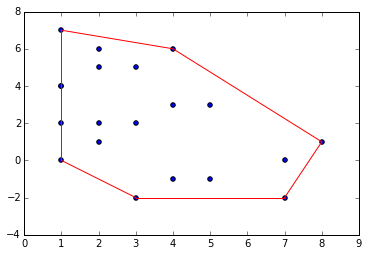

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(123)
points =  [(x,y) for x,y in zip(list(np.random.randint(1, 10, size=20)), list(np.random.randint(-2, 8, size=20)))]
hull = quickhull_init(points)



plt.figure()
for edge in hull:
    # edge is of form ((x1, y1), (x2, y2))
    plt.plot([edge[0][0], edge[1][0]], [edge[0][1], edge[1][1]], color='r')
plt.scatter([p[0] for p in points], [p[1] for p in points])
plt.show()

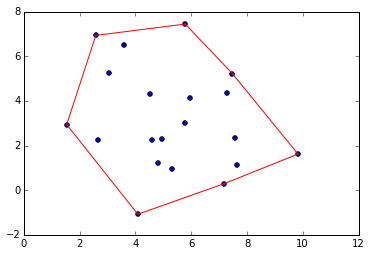

In [58]:
np.random.seed(123)
points =  [(x,y) for x,y in zip(list(np.random.uniform(1, 10, size=20)), list(np.random.uniform(-2, 8, size=20)))]
hull = quickhull_init(points)



plt.figure()
for edge in hull:
    # edge is of form ((x1, y1), (x2, y2))
    plt.plot([edge[0][0], edge[1][0]], [edge[0][1], edge[1][1]], color='r')
plt.scatter([p[0] for p in points], [p[1] for p in points])
plt.show()

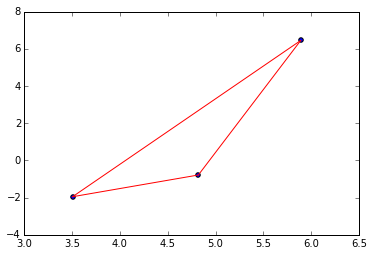

In [62]:
np.random.seed(100)
points = [(x,y) for x,y in zip(list(np.random.uniform(1, 10, size=3)), list(np.random.uniform(-2, 8, size=3)))]
hull = quickhull_init(points)



plt.figure()
for edge in hull:
    # edge is of form ((x1, y1), (x2, y2))
    plt.plot([edge[0][0], edge[1][0]], [edge[0][1], edge[1][1]], color='r')
plt.scatter([p[0] for p in points], [p[1] for p in points])
plt.show()

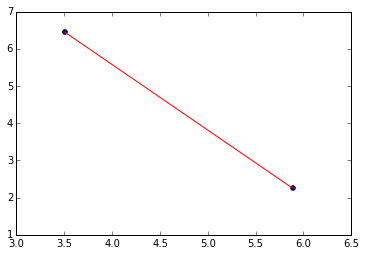

In [63]:
np.random.seed(100)
points = [(x,y) for x,y in zip(list(np.random.uniform(1, 10, size=2)), list(np.random.uniform(-2, 8, size=2)))]
hull = quickhull_init(points)



plt.figure()
for edge in hull:
    # edge is of form ((x1, y1), (x2, y2))
    plt.plot([edge[0][0], edge[1][0]], [edge[0][1], edge[1][1]], color='r')
plt.scatter([p[0] for p in points], [p[1] for p in points])
plt.show()

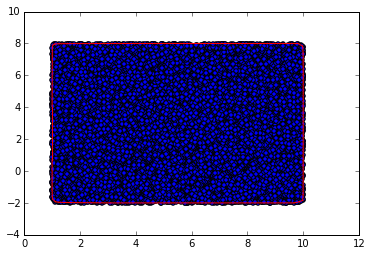

In [64]:
np.random.seed(1000)
points = [(x,y) for x,y in zip(list(np.random.uniform(1, 10, size=20000)), list(np.random.uniform(-2, 8, size=20000)))]
hull = quickhull_init(points)



plt.figure()
for edge in hull:
    # edge is of form ((x1, y1), (x2, y2))
    plt.plot([edge[0][0], edge[1][0]], [edge[0][1], edge[1][1]], color='r')
plt.scatter([p[0] for p in points], [p[1] for p in points])
plt.show()

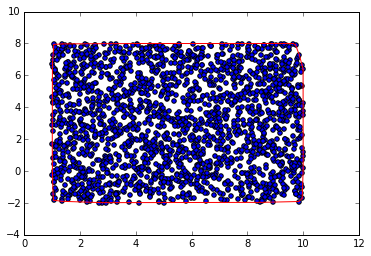

In [65]:
np.random.seed(1000)
points = [(x,y) for x,y in zip(list(np.random.uniform(1, 10, size=2000)), list(np.random.uniform(-2, 8, size=2000)))]
hull = quickhull_init(points)



plt.figure()
for edge in hull:
    # edge is of form ((x1, y1), (x2, y2))
    plt.plot([edge[0][0], edge[1][0]], [edge[0][1], edge[1][1]], color='r')
plt.scatter([p[0] for p in points], [p[1] for p in points])
plt.show()

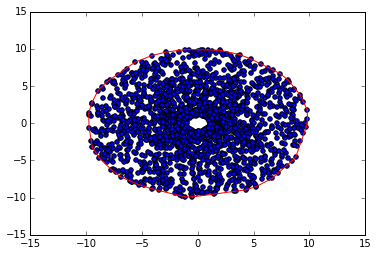

In [68]:
import math
np.random.seed(1000)
points = [(r * math.cos(theta), r * math.sin(theta)) for r, theta in zip(list(np.random.uniform(1, 10, size=2000)), list(np.random.uniform(0, 2 * math.pi, size=2000)))]
hull = quickhull_init(points)



plt.figure()
for edge in hull:
    # edge is of form ((x1, y1), (x2, y2))
    plt.plot([edge[0][0], edge[1][0]], [edge[0][1], edge[1][1]], color='r')
plt.scatter([p[0] for p in points], [p[1] for p in points])
plt.show()